In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("C:/Users/NIKHIL/Desktop/Tution Classes/Linear Regression/HousingData.csv")
data=data.dropna(axis=0)

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
x=data['B'].values
x.shape

(394,)

In [5]:
y=data['MEDV'].values
y.shape

(394,)

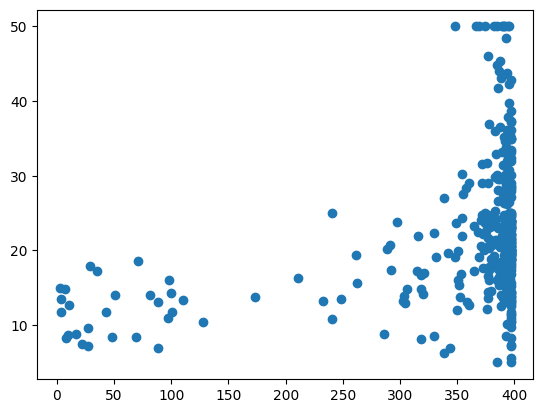

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
data['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
5      58.7
       ... 
499    73.5
500    79.7
502    76.7
503    91.0
504    89.3
Name: AGE, Length: 394, dtype: float64

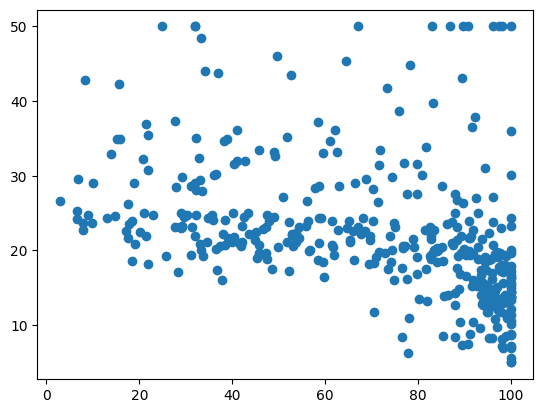

In [8]:
x=data['AGE'].values
plt.scatter(x,y)
plt.show()

In [9]:
train_len=int(0.8*len(data))
train_len

315

In [10]:
x_train=x[:train_len]
y_train=y[:train_len]

In [11]:
x_val=x[train_len:train_len+int(0.1*len(data))]
y_val=y[train_len:train_len+int(0.1*len(data))]
x_val.shape

(39,)

In [12]:
x_test=x[train_len+int(0.1*len(data)):]
y_test=y[train_len+int(0.1*len(data)):]
x_test.shape

(40,)

In [13]:
### hypothesis funstion
def hypothesis(theta,x):
    y_=theta[0]+theta[1]*x
    return y_
    

In [14]:
#### loss function
def loss(x_train,y_train,theta):
    m=x_train.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(theta,x_train[i])
        total_error+=(y_-y_train[i])**2
    return total_error/m

In [15]:
##### function to calculate gradient
def gradient(x_train,y_train,theta):
    m=x_train.shape[0]
    grad=np.array([0.0,0.0])
    for i in range(m):
        y_=hypothesis(theta,x_train[i])
        grad[0]+=(y_-y_train[i])
        grad[1]+=(y_-y_train[i])*x_train[i]
    return grad/m

In [16]:
##########gradient descent
def gradient_descent(x_train,y_train,learning_rate=0.0001):
    m=x_train.shape[0]
    theta=np.array([np.random.randn(),np.random.randn()])
    l=[]
    for i in range(10):
        grad=gradient(x_train,y_train,theta)
        ll=loss(x_train,y_train,theta)
        l.append(ll)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
#         print(theta)
    return theta,l

In [17]:
theta,loss=gradient_descent(x_train,y_train)


In [18]:
theta.shape

(2,)

In [19]:
loss

[606.6958049542052,
 320.2324032978775,
 249.9171236908421,
 232.65472154783177,
 228.41398158932446,
 227.3693678174374,
 227.10923329685613,
 227.04164686556533,
 227.02132087990546,
 227.01259494428203]

In [20]:
y_pred=[]
for i in x_train:
    t=theta[0]+theta[1]*i
    y_pred.append(t)
#     print("t",t,"y_true",y_train[i])

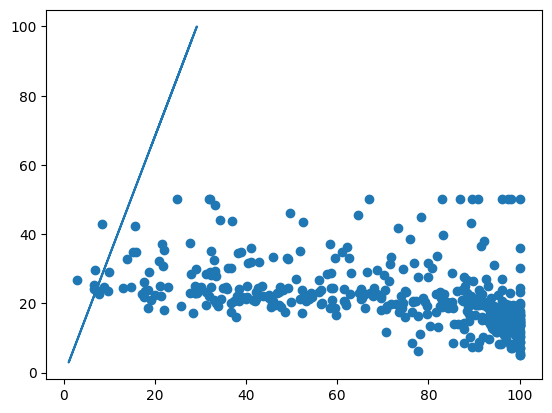

In [21]:
plt.plot(y_pred,x_train)
plt.scatter(x,y)
plt.show()

In [22]:
###########################